# House Prices: Advanced Regression Techniques - Projeto de Machine Learning

Olá! Meu nome é Gustavo Felici e este é um dos meus projetos de Data Science no Kaggle. Neste projeto, estou trabalhando no desafio "House Prices: Advanced Regression Techniques" que tem como objetivo prever o preço de venda de casas com base em diversas variáveis descritivas das propriedades. Este é um projeto emocionante que me permitiu aprimorar minhas habilidades em análise exploratória de dados, pré-processamento de dados e modelagem de machine learning.

Durante o projeto, usei bibliotecas populares de Python, como Pandas, NumPy e Scikit-Learn, para manipular, visualizar e modelar os dados. Para garantir resultados confiáveis, usei técnicas de validação cruzada e otimização de hiperparâmetros para ajustar meus modelos de machine learning. Além disso, usei técnicas de visualização para identificar tendências e relacionamentos importantes entre as variáveis descritivas e o preço das casas.

Além disso, gostaria de mencionar que usei como referência de workflow o projeto **["Data Science Workflow - Top 2% with Tuning"](https://www.kaggle.com/code/angqx95/data-science-workflow-top-2-with-tuning)** de Ang Qin Xuan, disponível no Kaggle. Este projeto forneceu uma estrutura sólida para conduzir meu próprio trabalho, incluindo etapas para limpeza e pré-processamento de dados, exploração de dados, engenharia de recursos e seleção de modelos. A partir desse modelo, fui capaz de personalizar o workflow para o problema específico do House Prices do Kaggle. Sou grato à comunidade do Kaggle por fornecer recursos úteis como esse projeto.

Agradeço pelo interesse neste projeto e espero que você ache meu trabalho interessante e informativo.

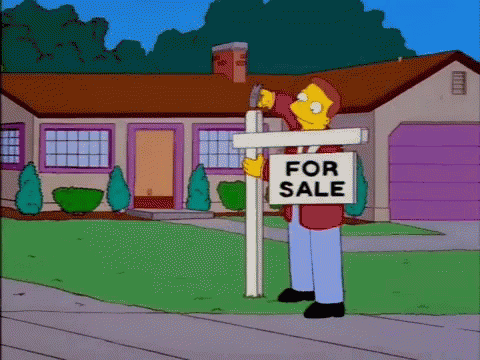

# Libraries

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

# Understanding Data

## First View

In [337]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/House Prices/Input/train.csv')

In [338]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [339]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [340]:
df = df.drop('Id',axis=1)

In [341]:
df.shape

(1460, 80)

In [342]:
pd.DataFrame(df.dtypes).sort_values(by=0)

,0
MSSubClass,int64
BsmtUnfSF,int64
TotalBsmtSF,int64
1stFlrSF,int64
2ndFlrSF,int64
...,...
KitchenQual,object
Condition2,object
Foundation,object
Electrical,object


In [343]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

Linhas duplicadas

In [344]:
df.duplicated().sum()

0

Valores nulos

In [345]:
missing_values = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing_values['percent'] = df.isnull().sum().sort_values(ascending=False) / df.shape[0]
missing_values['dtype'] = df.dtypes
print('missing columns values: ', missing_values[ missing_values[0] > 0 ].shape[0])
missing_values = missing_values[ missing_values[0] > 0 ]
missing_values

missing columns values:  19


,0,percent,dtype
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageYrBlt,81,0.055479,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageFinish,81,0.055479,object


Temos valores como PoolQC, MiscFeature e Alley com um percentual de nulos em relação aos volume de dados, muito grande. Oque inviabiliza uma análise porque a variavel está enviesada.

## Univariate Analysis
A Análise Univariada (Univariate Analysis) nos ajuda a compreender melhor todas as características, em uma escala individual. Para aprofundar ainda mais os nossos conhecimentos e descobrir um padrão potencial nos dados, teremos também que descobrir mais sobre a relação entre todas estas características umas com as outras, que é o próximo passo da análise Bivariate Analysis


### Target

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

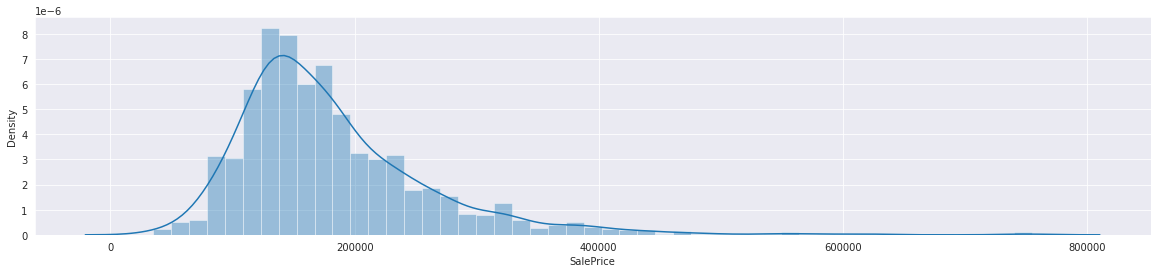

In [346]:
plt.figure(figsize=(20,4))
sns.distplot(df['SalePrice'])

Nossa target está enviesado para esquerda, onde temos mais amostras.
Ter um target enviesado afetará o desempenho global do nosso modelo de aprendizagem da máquina, portanto, uma forma de aliviar a situação será utilizar a transformação de log no alvo enviesado  para reduzir o enviesamento da distribuição.

### Numeric Features

In [347]:
numeric_columns = list(df.drop('SalePrice', axis=1).select_dtypes(exclude=['object']).columns)
len(numeric_columns)

36

#### Histogram
Para as características numéricas, estamos sempre preocupados com a distribuição destas características, incluindo as características estatísticas destas colunas, por exemplo, média, mediana, moda. Assim, utilizaremos normalmente o gráfico histograma para visualizar a distribuição dos dados. 

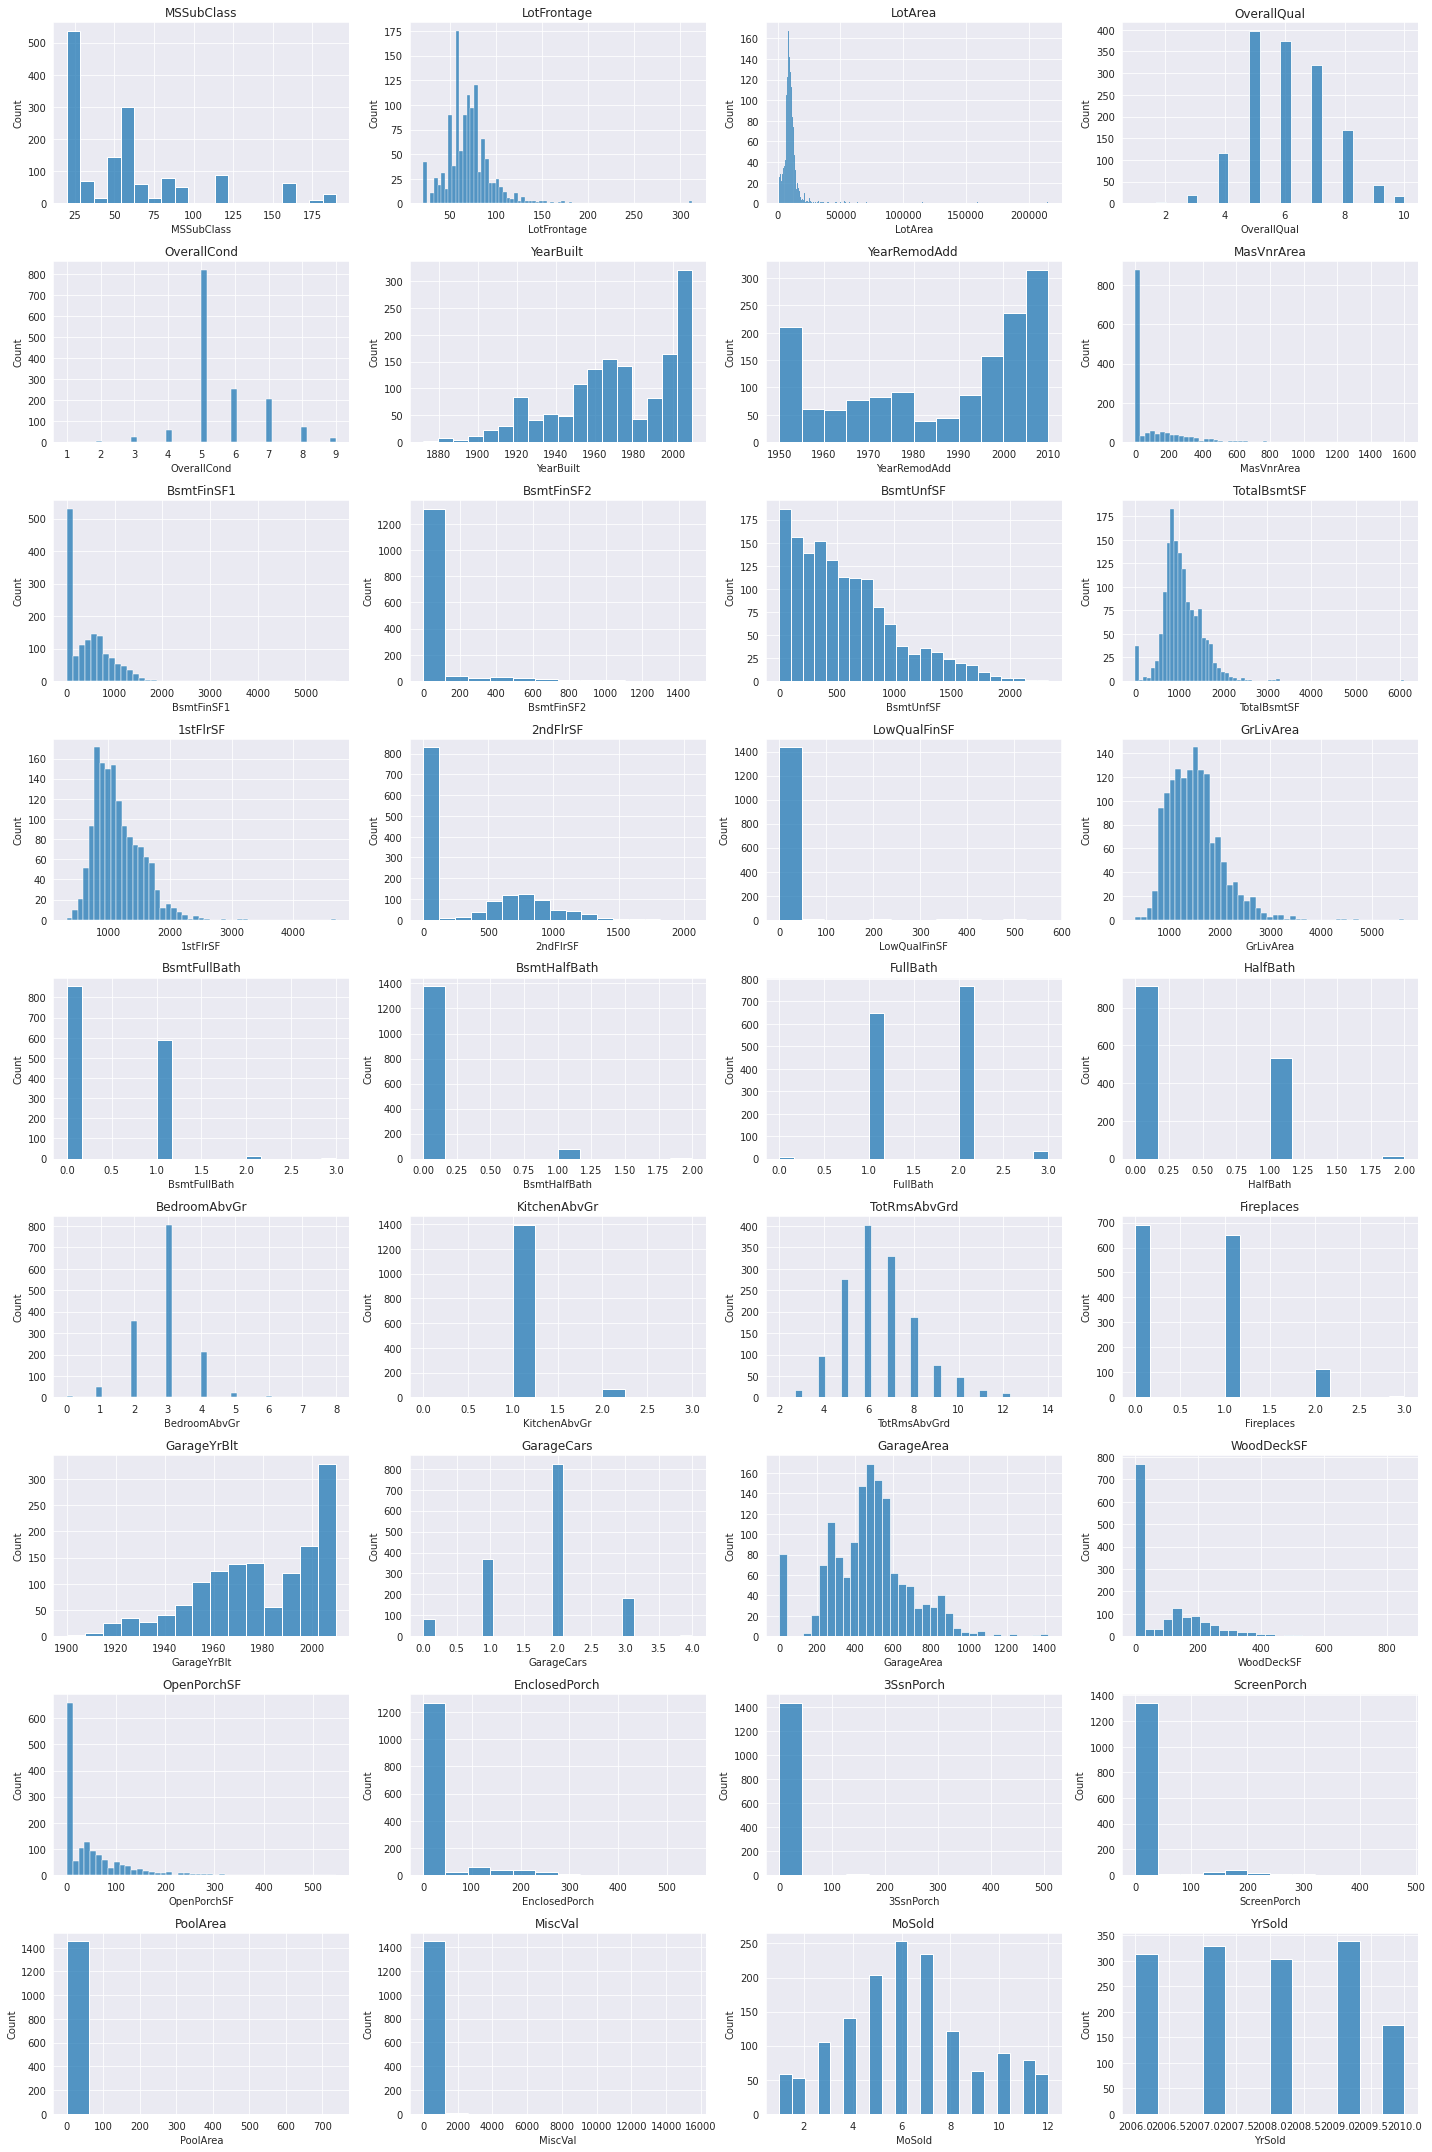

In [348]:
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Fazendo as observações enumerando pelas colunas que julgo necessario.
1. `LotFrontage` e `LotArea`, parece possuir bastante outliers
2. `MasVnrArea` grande consistencia de valores, mas entre os outros eles parecem estarem bem distribuidos e possuem outiliers.
3. `BsmtFinSF2` Valores muito concentrados no 0, pode indicar uma coluna enviesada, vamos checar mais tarde.
4. `LowQualFinSF` evidente que está enviesada, só possuí valores no 0
5. `BsmtHalfBath` temos que checar a distribuição para ver se está de fato enviesada
6. `KitchenAbvGr` temos que checar a distribuição de valores mais a fundo.
8. `EnclosedPorch`, `3SsnPorch`, `ScreenPorch` mais colunas enviesadas.
9. `PoolArea`, `MiscVal` claramente enviesadas

In [349]:
outliers_hist = ['LotFrontage', 'LotArea']
skewed_hist = ['MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

#### Box
Boxplots são também normalmente utilizados para entender as características estatísticas de cada característica. Na maior parte das vezes, usamos para procurar quaisquer outliers que possamos precisar de filtrar mais tarde durante a etapa de pré-processamento.

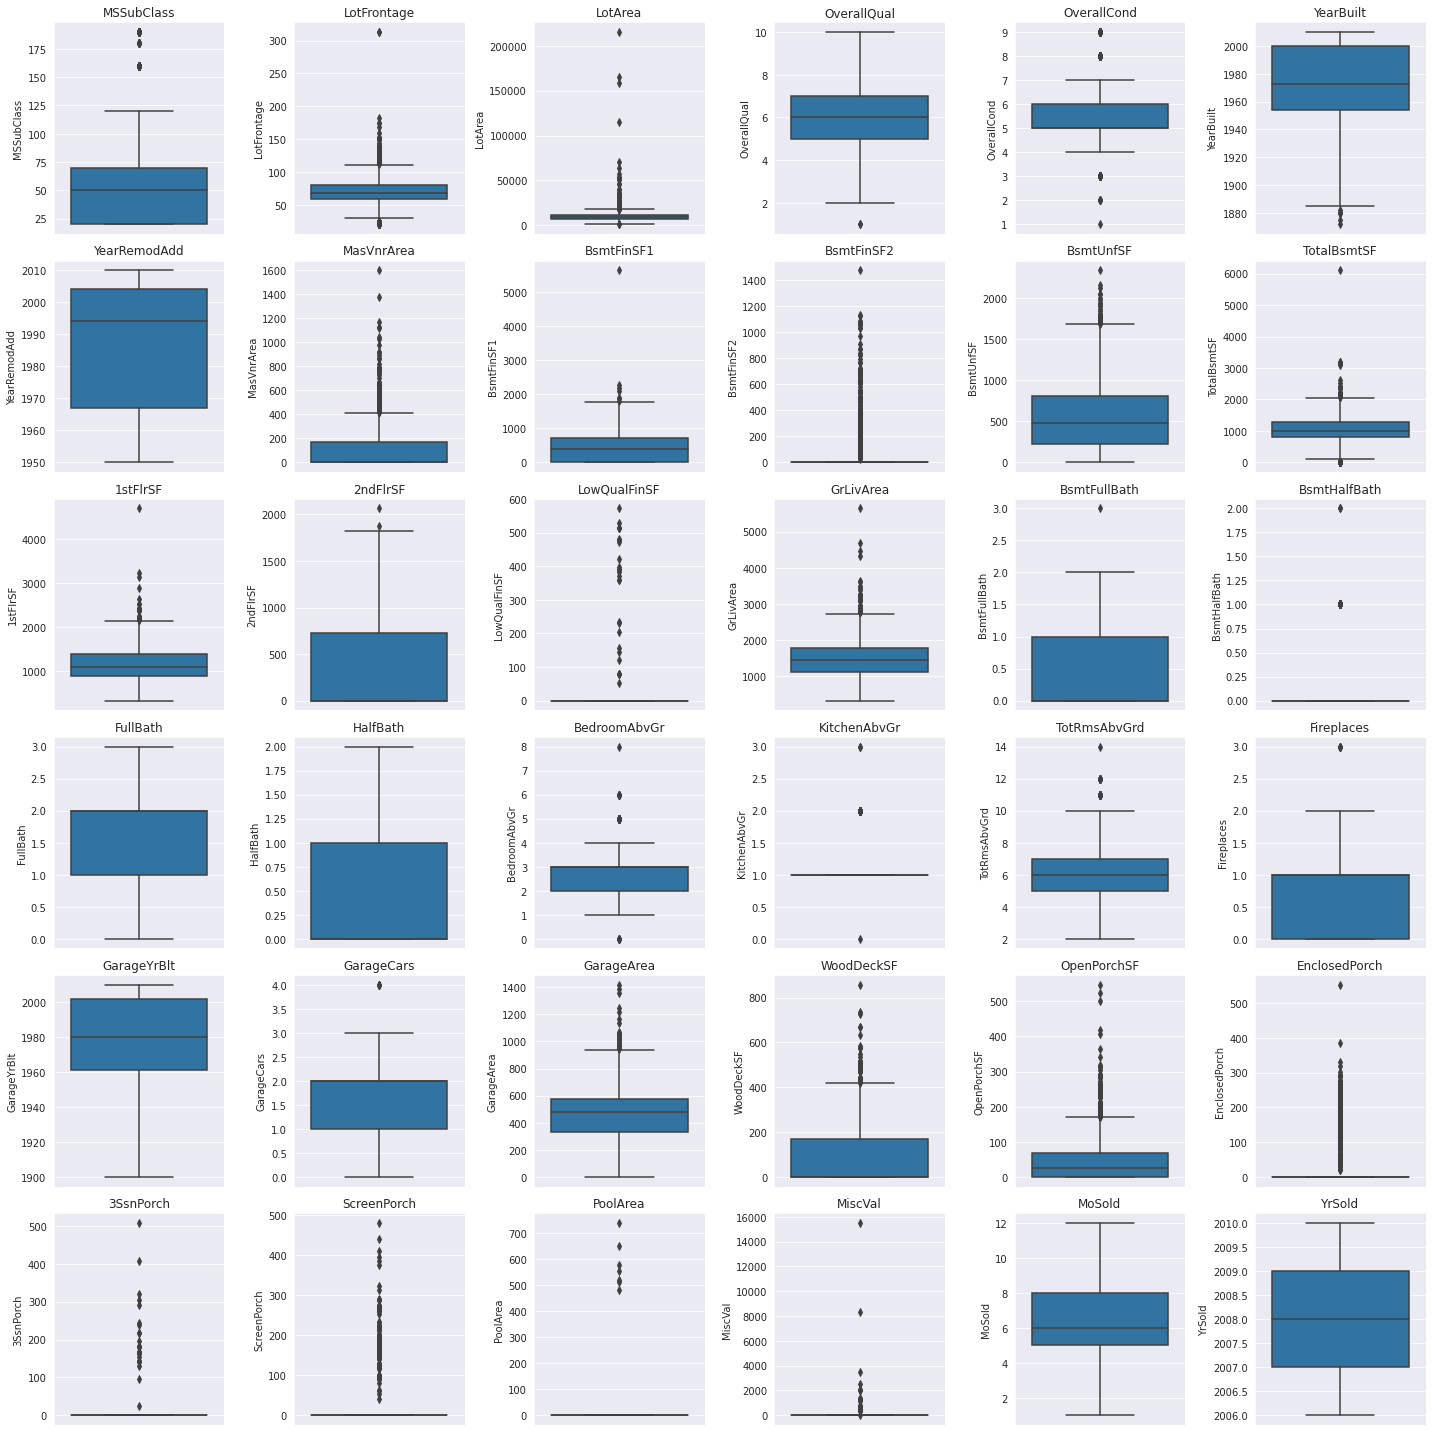

In [350]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Novamente vou enumerar coluna a coluna onde julgo importante falar.

1. `LotFrontage`, `LotArea` outliers a serem observados
2. `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF` e `TotalBsmtSF` outiliers a serem observados.
3. `1stFlrSF`, `GrLivArea` observar outiliers.
4. `KitchenAbvGr` enviesado
5. `GarageArea`, `WoodDeckSF`, `OpenPorchSF` outliers para ser observados e `EnclosedPorch` possivelmente enviesado
6. `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal` enviesados

In [351]:
outliers_box = [ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
skewed_box = ['KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

### Categorical Features
No caso de características categóricas, utilizaremos muitas vezes os Countplots para visualizar a contagem de cada valor distinto dentro de cada característica. Podemos ver por exemplo se existem dados enviesados(skewed) que consistem principalmente em apenas um valor, o que não acrescenta qualquer informação útil. Assim, podemos removê-los mais tarde.

In [352]:
object_columns = df.select_dtypes(include= 'object' ).columns
len(object_columns)

43

#### Count

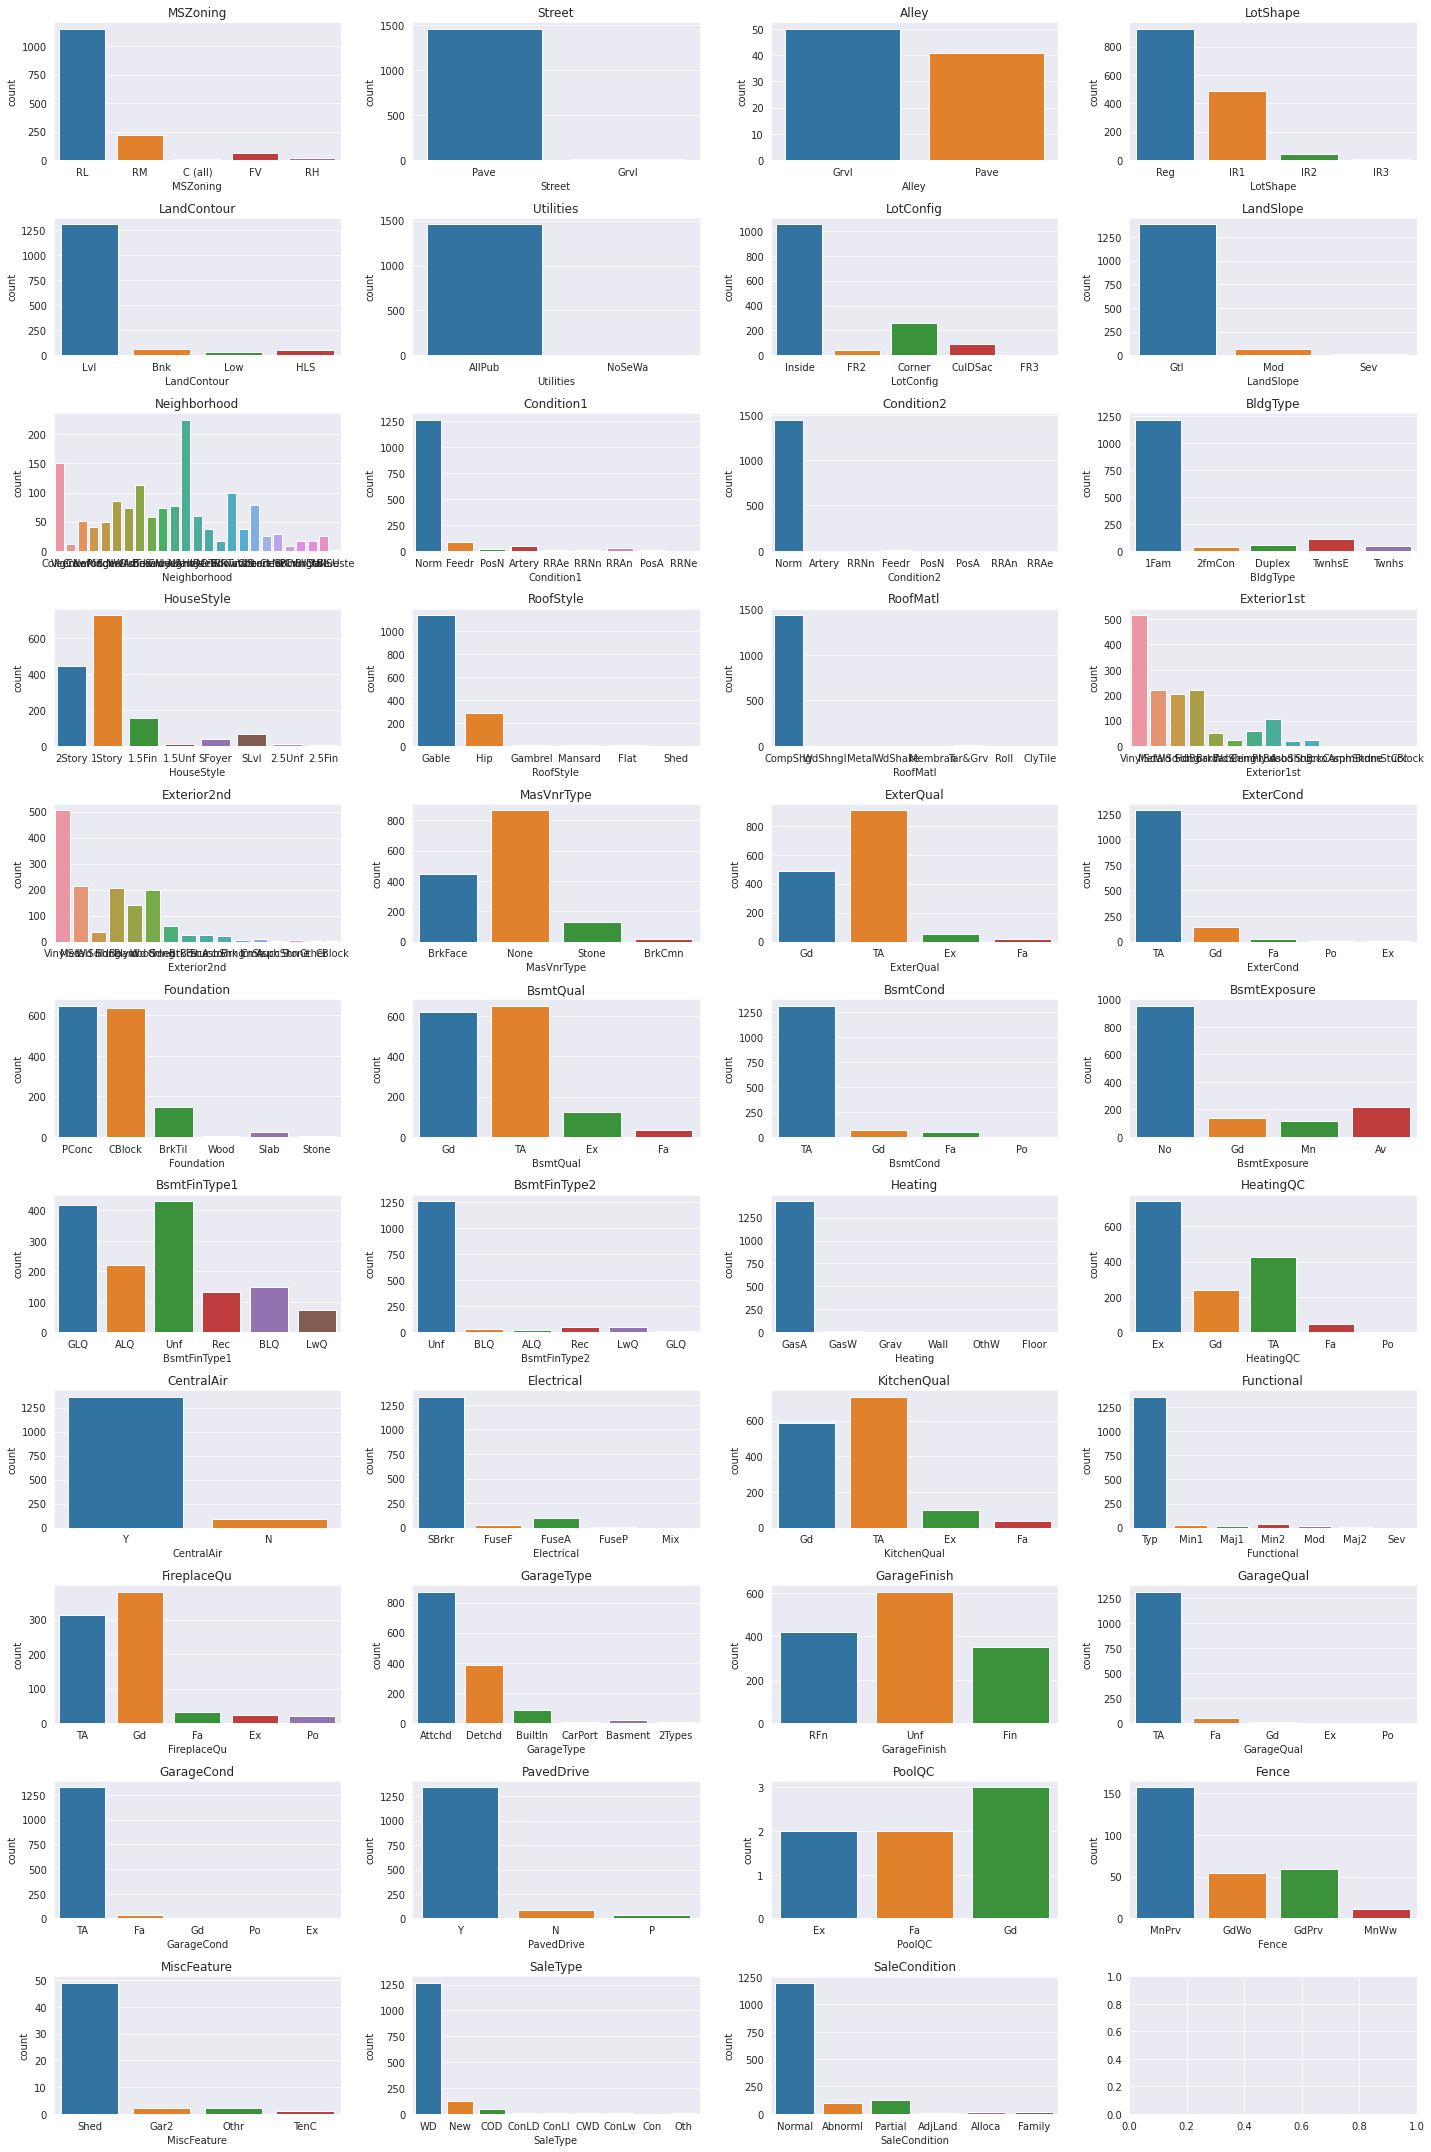

In [353]:
fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(object_columns):
    sns.countplot(x=column, data=df, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

Observações coluna a coluna.
1. `Street` enviesada
2. `Utilities` enviesada, `LandSlope` possivelmente enviesada.
3. `Condition1` e `Condition2` possivelmente enviesadas.
4. `RoofMatl` enviesada
6. `Heating` enviesada
7. `Functional` possivelmente enviesada
8. `GarageQual` possivelmente enviesada
9. `GarageCond` possivelmente enviesada.

## Bi-variate Analysis
A análise bi-variada analisa 2 características diferentes para identificar qualquer possível relação ou padrões distintivos entre as 2 características. Uma das técnicas habitualmente utilizadas é através da **Matriz de Correlação (Correlation Matrix)**. A matriz de correlação é uma ferramenta eficaz para descobrir a relação linear (**Correlação**) entre quaisquer 2 características contínuas. A **correlação** não só nos permite determinar que características são importantes para o target, mas também como meio de investigar qualquer **multicolinearidade (multicollinearity)** entre os nossos preditores independentes. A **multicolinearidade** acontece quando 2 ou mais variáveis independentes estão altamente correlacionadas entre si. Em tal situação, causa uma perda de precisão nos nossos coeficientes de regressão, afetando a nossa capacidade de identificar as características mais importantes que são mais úteis para o nosso modelo. 

(Fonte: [Basta! Lidando com a multicolinearidade na análise de regressão (minitab.com)](https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao))

### Correlation Matrix
A partir da matriz de correlação, identificamos as variáveis referidas que estão altamente correlacionadas entre si. Esta descoberta irá guiar-nos nas nossas etapas de pré-processamento mais tarde, uma vez que o nosso objetivo é remover características altamente correlacionadas para evitar perdas de desempenho no nosso modelo.

<AxesSubplot:>

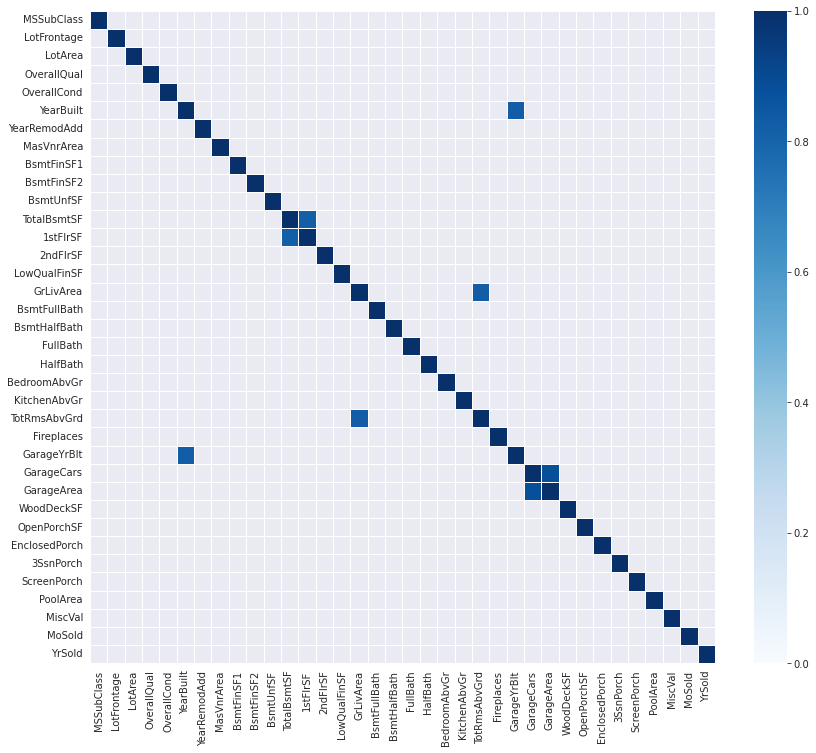

In [354]:
plt.figure(figsize=(14,12))
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, mask = correlation < 0.8, linewidth=0.5, cmap='Blues', vmin=0)

In [355]:
high_corr_cols = []
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            high_corr_cols.append(colname)

high_corr_cols

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

### Features numéricas e o Target
Abaixo, classificamos a força da relação linear entre o target outras características.c

<AxesSubplot:>

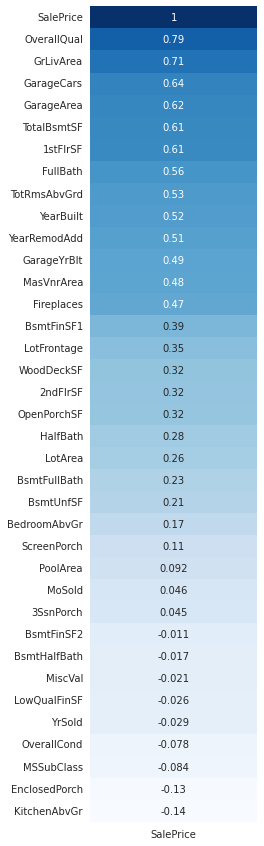

In [356]:
correlation = df[ numeric_columns + ['SalePrice']].corr()
target_correlation = correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)
target_correlation

plt.figure(figsize=(3,15))
sns.heatmap(target_correlation, annot=True, cmap='Blues', cbar=False)

In [357]:
target_positive_corr = list(target_correlation[ target_correlation > 0 ].dropna().index)
target_positive_corr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch']

### Scatterplot (Gráfico de Dispersão)
A utilização de scatterplot pode também ajudar-nos a identificar uma potencial relação linear entre as características numéricas. Embora o diagrama de dispersão não forneça provas quantitativas sobre a força da relação linear entre as nossas características, é útil para nos ajudar a visualizar qualquer tipo de relação que a matriz de correlação não pôde calcular. Por exemplo, relações quadráticas (curva côncava para cima (quando o coeficiente de X² é positivo) ou uma curva côncava para baixo (quando o coeficiente de X² é negativo).), exponenciais(pode ser visto como uma curva exponencial. Uma relação exponencial pode mostrar um crescimento ou declínio exponencial).

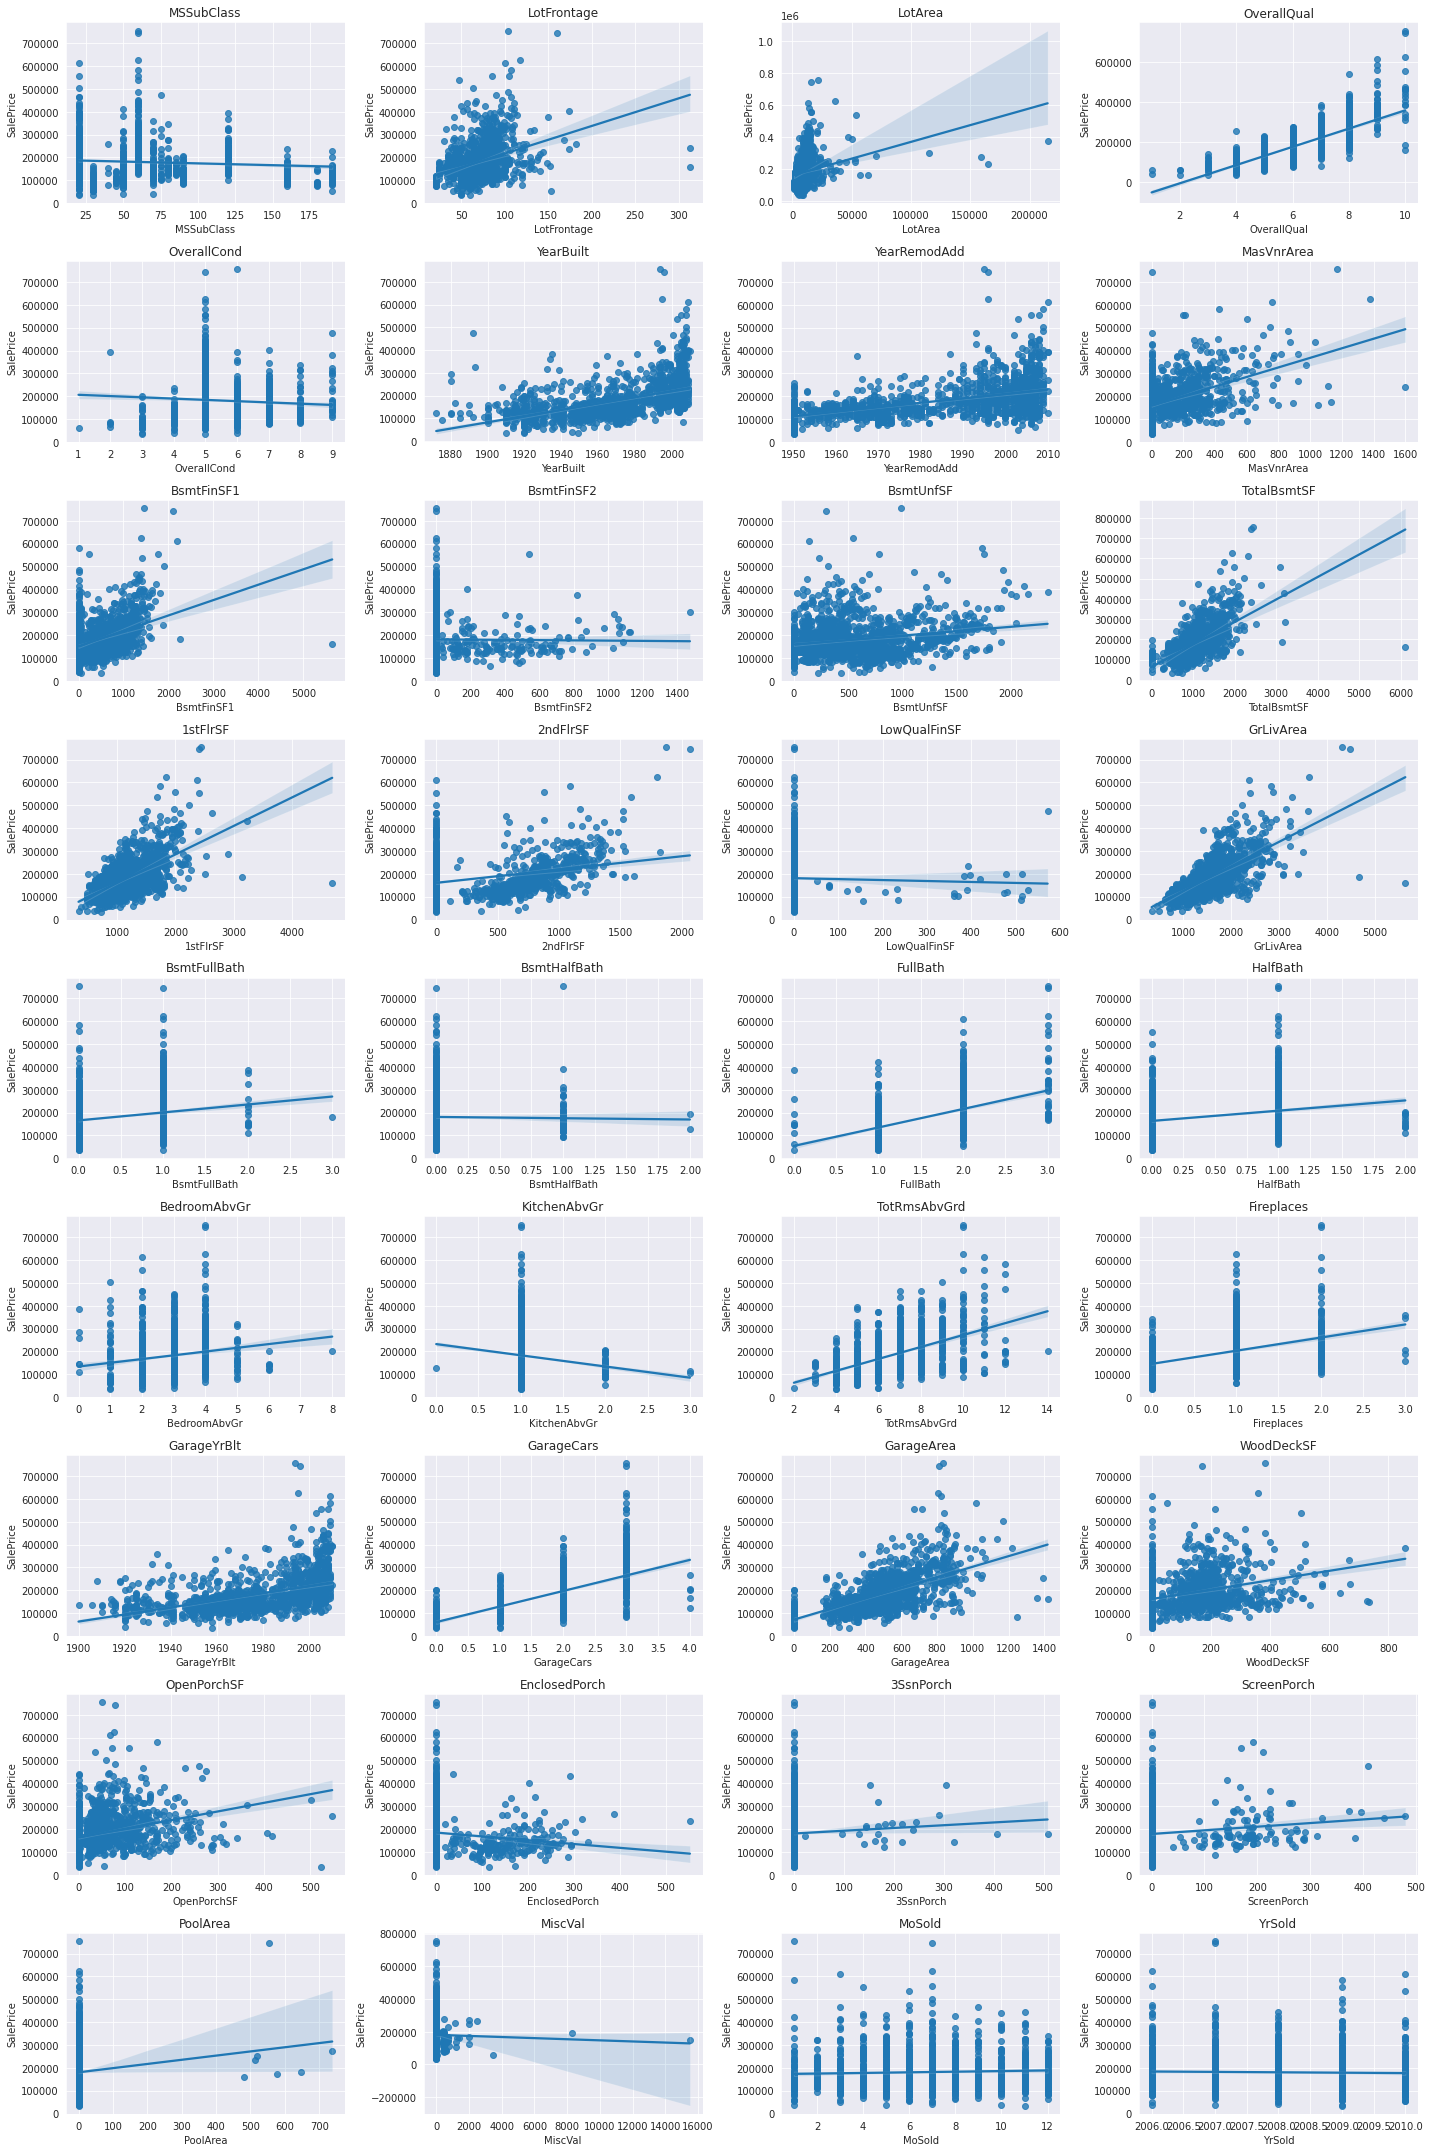

In [358]:
fig, axs = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
axs = axs.ravel()

for i, column in enumerate(numeric_columns):
    sns.regplot(data=df, x=column, y='SalePrice', ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

As unicas colunas que não mostram nenhuma forma de correlação são `MoSold` e `YrSold`, vemos as outras variaveis com poucos valores como ja tinhamos visto antes, e variaveis com forte poder de previsão, como `GrLivArea` como vimos na matrix de correlação

In [359]:
not_relevant = ['MoSold', 'YrSold']

# Data Processing
Agora que finalizamos a análise dos nossos dados e a obtenção de conhecimentos através das várias análises e visualizações, teremos de aproveitar estes conhecimentos para orientar a nossa decisão de pré-processamento, de modo a fornecer dados limpos e isentos de erros para que o nosso modelo possa ser treinado posteriormente.

## Multicolinearidade
A partir da matriz de correlação acima, identificámos certas características que estão altamente correlacionadas Eliminaremos as características altamente correlacionadas para evitar o problema da multicolinearidade explicada anteriormente. (redundancia)

In [360]:
high_corr_cols

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [361]:
df = df.drop(high_corr_cols, axis=1)

## Missing Values
Para além destas características altamente correlacionadas, removeremos também características que não são muito úteis na previsão devido a muitos valores em falta. Se  há muitos valores em falta  o dado não consegue nós fornecer qualquer informação útil.

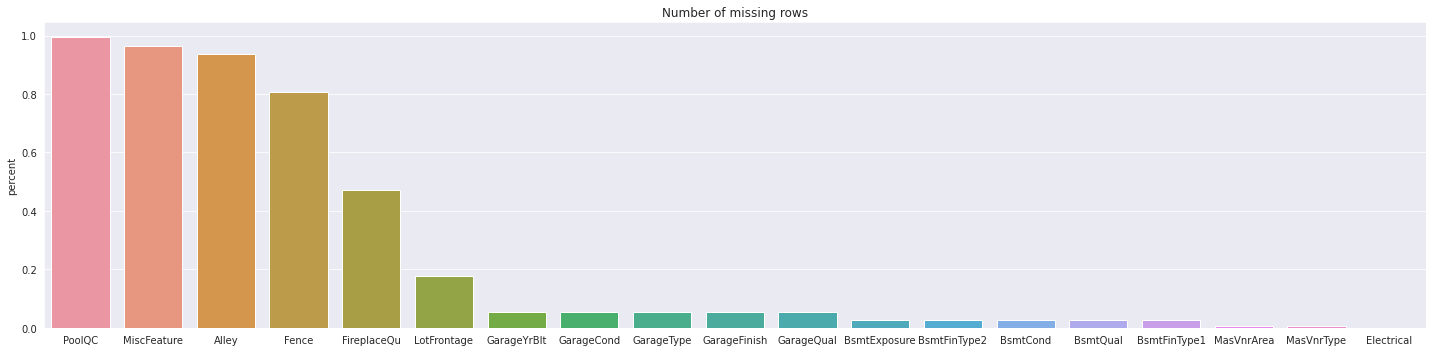

In [362]:
plt.figure(figsize=(20,5))
plt.title('Number of missing rows')
sns.barplot(x=missing_values.index, y= missing_values['percent'])
plt.tight_layout()

`PoolQC`, `MiscFeature` e `Alley` possuem muitos valores nulos oque mostra caracteristicas uteis para uma previsão.

In [363]:
drop_columns = ['PoolQC', 'MiscFeature', 'Alley']
df = df.drop(drop_columns, axis=1)

## Features não importantes na previsão do Target
Também removeremos as características que não têm qualquer relação linear com o Target. Podemos ver abaixo as variaveis não têm qualquer impacto no Target.

In [364]:
not_relevant

['MoSold', 'YrSold']

In [365]:
df = df.drop(not_relevant, axis=1)

## Remoção de características que na sua maioria têm apenas 1 valor

In [366]:
skewed = pd.DataFrame()

for column in df.columns:
  new_row = {
      'index': column,
      'count': len(df[column].value_counts(normalize=True)),
      'max_normalize': df[column].value_counts(normalize=True).max(),
      'values': list(df[column].value_counts(normalize=True).sort_values(ascending=False).index)
      
  }
  skewed = skewed.append(new_row, ignore_index=True)

skewed = skewed.sort_values(by='max_normalize', ascending=False).set_index('index')
skewed[ skewed['max_normalize'] > 0.9]

<ipython-input-366-706a0653a37e>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewed = skewed.append(new_row, ignore_index=True)
<ipython-input-366-706a0653a37e>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewed = skewed.append(new_row, ignore_index=True)
<ipython-input-366-706a0653a37e>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewed = skewed.append(new_row, ignore_index=True)
<ipython-input-366-706a0653a37e>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewed = skewed.append(new_row, ignore_index=True)
<ipython-input-366-706a0653a37e>:11: FutureWarning: The frame.append method is deprecated and will be remove

,count,max_normalize,values
index,,,
Utilities,2,0.999315,"[AllPub, NoSeWa]"
Street,2,0.995890,"[Pave, Grvl]"
PoolArea,8,0.995205,"[0, 512, 648, 576, 555, 480, 519, 738]"
Condition2,8,0.989726,"[Norm, Feedr, Artery, RRNn, PosN, PosA, RRAn, ..."
3SsnPorch,20,0.983562,"[0, 168, 144, 180, 216, 320, 407, 130, 140, 50..."
LowQualFinSF,24,0.982192,"[0, 80, 360, 473, 513, 234, 528, 572, 144, 392..."
RoofMatl,8,0.982192,"[CompShg, Tar&Grv, WdShngl, WdShake, Metal, Me..."
Heating,6,0.978082,"[GasA, GasW, Grav, Wall, OthW, Floor]"
MiscVal,21,0.964384,"[0, 400, 500, 700, 450, 600, 2000, 1200, 480, ..."


In [367]:
threshold = 0.96
skewed_threshold = list(skewed[ skewed['max_normalize'] >= threshold].index)
skewed_threshold

['Utilities',
 'Street',
 'PoolArea',
 'Condition2',
 '3SsnPorch',
 'LowQualFinSF',
 'RoofMatl',
 'Heating',
 'MiscVal',
 'GarageCond']

### Valores Observados nos gráficos
Vamos comparar na tabela os valores que eu listei para ver se o max_normalize está alto, para ver se minhas observações estão boas

In [368]:
skewed_hist.extend(set(skewed_box) - set(skewed_hist)) # concatena as duas listas sem repetir os elementos
skewed.loc[ skewed_hist ]

,count,max_normalize,values
index,,,
MasVnrArea,327,0.592975,"[0.0, 72.0, 108.0, 180.0, 120.0, 16.0, 200.0, ..."
BsmtFinSF2,144,0.885616,"[0, 180, 374, 117, 41, 712, 93, 279, 469, 290,..."
LowQualFinSF,24,0.982192,"[0, 80, 360, 473, 513, 234, 528, 572, 144, 392..."
BsmtHalfBath,3,0.943836,"[0, 1, 2]"
KitchenAbvGr,4,0.953425,"[1, 2, 3, 0]"
EnclosedPorch,120,0.857534,"[0, 112, 96, 192, 144, 120, 216, 156, 116, 252..."
3SsnPorch,20,0.983562,"[0, 168, 144, 180, 216, 320, 407, 130, 140, 50..."
ScreenPorch,76,0.920548,"[0, 192, 120, 224, 189, 180, 147, 90, 160, 144..."
PoolArea,8,0.995205,"[0, 512, 648, 576, 555, 480, 519, 738]"


## E acabei de deixando passar alguns
De qualquer forma, vamos fazer o drop com base nas colunas do threshold

In [369]:
df = df.drop(skewed_threshold, axis=1)

## Lidar com os Outliers
A remoção de outliers evitará que o desempenho dos nossos modelos seja afectado por valores extremos. Eliminaremos os valores aberrantes com base num determinado valor limite. 

Do nosso boxplot mais cedo, identificámos as seguintes características com valores extremos extremos:

In [370]:
outliers_box

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [371]:
previous_removed = ['1stFlrSF', 'GarageArea']
outliers = set(outliers_box) - set(previous_removed) # remove as colunas que ja dropei

In [372]:
len(outliers)

10

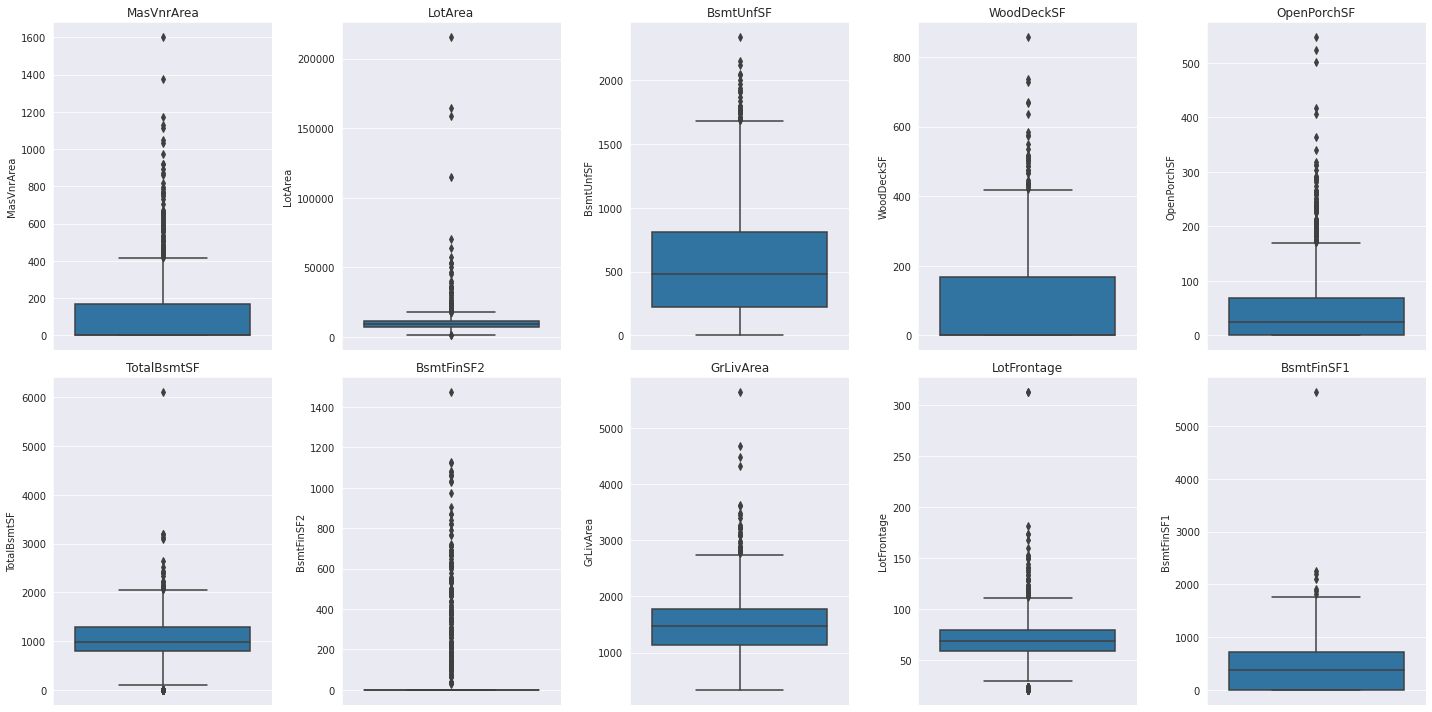

In [373]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.ravel()
for i, column in enumerate(outliers):
    sns.boxplot(data=df, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [374]:
drop_outliers = {
    'LotArea': 100000,
    'BsmtUnfSF': 2300,
    'WoodDeckSF': 800,
    'GrLivArea': 5000,
    'TotalBsmtSF': 4000,
    'BsmtFinSF1': 3000,
    'MasVnrArea': 1200,
    'OpenPorchSF': 500,
    'LotFrontage': 200,
    'BsmtFinSF2': 1200
}

In [375]:
df_outliers = df.copy()
for key, values in drop_outliers.items():
  count = len(df_outliers[df_outliers[key] >= values].index)
  df_outliers = df_outliers.drop(df_outliers[df_outliers[key] >= values].index)
  print(f'{key}: {values} - {count}')
print('df: ', df.shape)
print('df_outilers: ', df_outliers.shape)

LotArea: 100000 - 4
BsmtUnfSF: 2300 - 1
WoodDeckSF: 800 - 1
GrLivArea: 5000 - 1
TotalBsmtSF: 4000 - 0
BsmtFinSF1: 3000 - 0
MasVnrArea: 1200 - 2
OpenPorchSF: 500 - 3
LotFrontage: 200 - 1
BsmtFinSF2: 1200 - 1
df:  (1460, 61)
df_outilers:  (1446, 61)


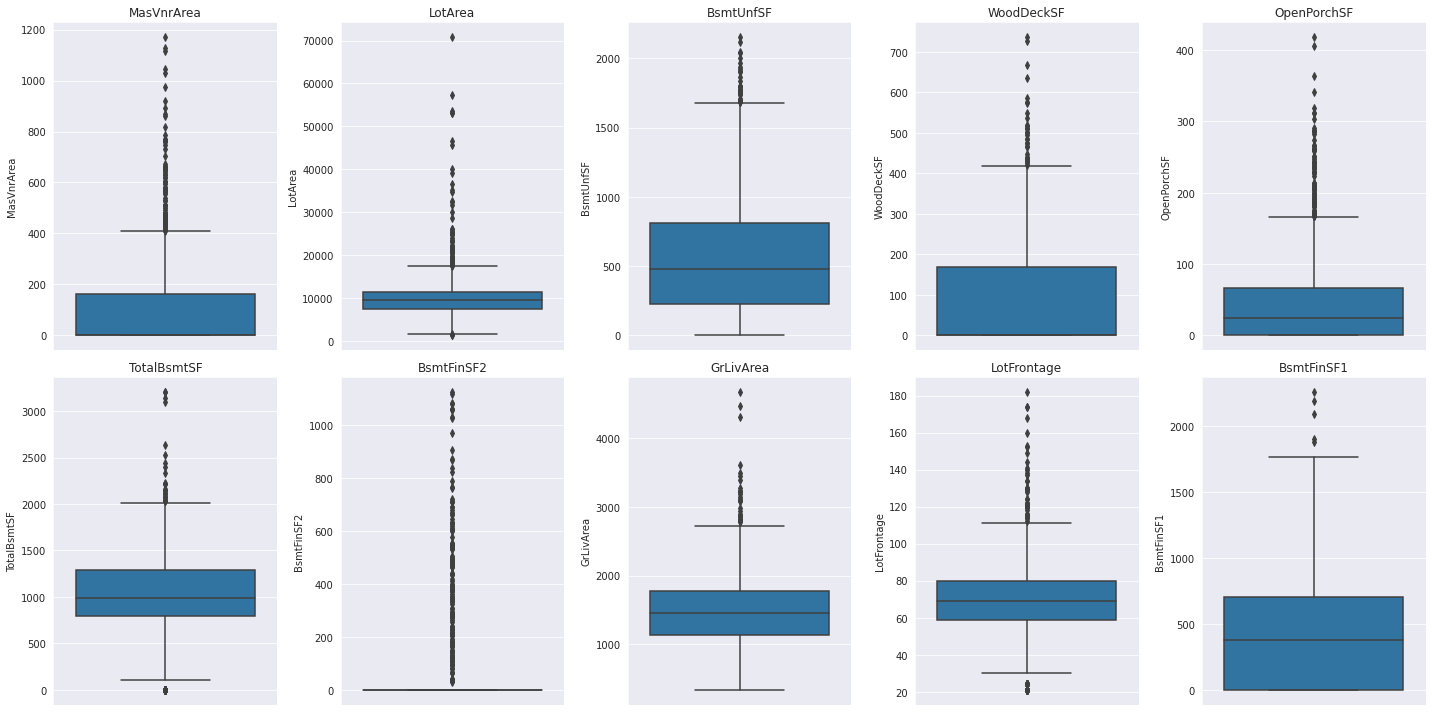

In [376]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.ravel()
for i, column in enumerate(outliers):
    sns.boxplot(data=df_outliers, y=column, ax=axs[i])
    axs[i].set_title(column)

plt.tight_layout()

In [377]:
df = df_outliers.copy()

## Ordinal Features
Substituiremos os valores ordinais em falta por NA, que serão mapeados mais tarde quando os codificarmos num arranjo ordenado

In [378]:
ordinal = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence', 'KitchenQual', 'HeatingQC','ExterQual','ExterCond']
df[ordinal] = df[ordinal].fillna('NA')

## Categorical features
Substituiremos o valor em falta das nossas características categóricas com a ocorrência mais frequente (moda) das características individuais. A partir dos estudos de outros notebooks que a regra de negocio, vemos que as variaveis categoricas variam de de acordo a `Neighborhood`(Physical locations within Ames city limits) então vamos substituir a partir da moda agrupada por essa coluna. 

In [379]:
cat = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
df[cat].mode()

,MasVnrType,MSZoning,Exterior1st,Exterior2nd,SaleType,Electrical,Functional
0,None,RL,VinylSd,VinylSd,WD,SBrkr,Typ


In [380]:
df.groupby('Neighborhood')['Exterior1st'].apply(lambda x: x.mode()[0]).reset_index()

,Neighborhood,Exterior1st
0,Blmngtn,VinylSd
1,Blueste,MetalSd
2,BrDale,HdBoard
3,BrkSide,Wd Sdng
4,ClearCr,Wd Sdng
5,CollgCr,VinylSd
6,Crawfor,Wd Sdng
7,Edwards,MetalSd
8,Gilbert,VinylSd
9,IDOTRR,MetalSd


In [381]:
df[cat] = df.groupby("Neighborhood")[cat].transform(lambda x: x.fillna(x.mode()[0]))

## Numerical features
Para as características numéricas, a abordagem comum será a de substituir o valor em falta pela média da distribuição das características.

In [382]:
numbers_cols = list(df.select_dtypes(exclude='object').columns)
missing_numbers = df[numbers_cols].isnull().sum()
missing_numbers[ missing_numbers > 0 ]

LotFrontage    256
MasVnrArea       8
dtype: int64

In [383]:
df[missing_numbers[ missing_numbers > 0 ].index].describe()

,LotFrontage,MasVnrArea
count,1190.000000,1438.000000
mean,69.510924,100.737135
std,22.067740,171.509283
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,163.750000
max,182.000000,1170.000000


Vemos que para o `LotFrontage` é interresante ser substituido pela media porque as medidas de tendencia central estão mostrando ela. ja no caso do `MasVnrArea`, vemos que as media está distante da médiana, isso pode ter acontecido por ainda haver grandes outliers, então oque vamos fazer é substituir pela mediana

In [384]:
LotFrontage_mean = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(LotFrontage_mean)

MasVnrArea_median = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(MasVnrArea_median)

## Changing Data Type
Existem algumas colunas que são ordinais por natureza, o que representa a qualidade ou condição de certas características. Neste caso, mapeamos as respectivas colunas para um valor. Quanto melhor for a qualidade, maior será o valor.

In [385]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [386]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
for col in ord_col:
    df[col] = df[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df[col] = df[col].map(fintype_map)

df['BsmtExposure'] = df['BsmtExposure'].map(expose_map)
df['Fence'] = df['Fence'].map(fence_map)

Depois de remover os valores aberrantes, características altamente correlacionadas e imputar valores em falta, podemos agora proceder à adição de informação adicional para que o nosso modelo possa ser treinado. Isto é feito através de - Feature Engineering.

#  Feature Engineering
A Engenharia de Características é uma técnica através da qual criamos novas características que podem potencialmente ajudar a prever a nossa variável alvo. Iremos criar características adicionais com base no nosso Conhecimento do Negócio.

Com base na característica actual que temos, o primeiro feito adicional que podemos acrescentar seria TotalLot, que resume tanto o LotFrontage como o LotArea para identificar a área total de terreno disponível como lote. Podemos também calcular o número total da área de superfície da casa, TotalSF adicionando a área do subsolo e do 2º andar. TotalBath pode também ser utilizado para nos dizer no total quantas casas de banho existem na casa. Podemos também adicionar todos os diferentes tipos de varandas à volta da casa e generalizar para uma área total de varanda, TotalPorch.

In [387]:
df['TotalLot'] = df['LotFrontage'] + df['LotArea']
df['TotalBsmtFin'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['TotalSF'] = df['TotalBsmtSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + df['HalfBath']
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']

Date Columns

In [388]:
df['BuildToRemod'] = df['YearRemodAdd']	- df['YearBuilt'] 
df['BuildToRemod'].value_counts().sort_values(ascending=False)

0      760
1      212
30      19
2       14
35      14
      ... 
121      1
106      1
103      1
76       1
84       1
Name: BuildToRemod, Length: 108, dtype: int64

## Binay Columns
Também incluímos a engenharia de características simples criando colunas binárias para algumas características que podem indicar a presença(1) / ausência(0) de algumas características

In [389]:
columns = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch', 'BuildToRemod']

for column in columns:
    df[column +'_bin'] = df[column].apply(lambda x: 1 if x > 0 else 0)

## Target
Checar se a distribuição está enviesada. Ter um target enviesado afetará o desempenho global do nosso modelo de aprendizagem da máquina, portanto, uma forma de aliviar a situação será utilizar a transformação de log no alvo enviesado  para reduzir o enviesamento da distribuição.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

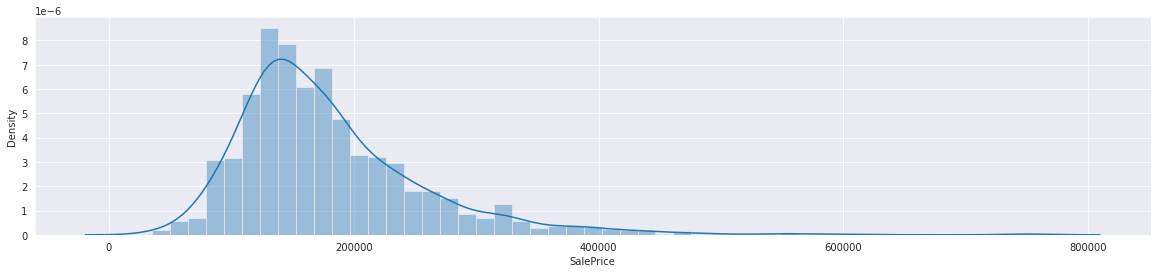

In [390]:
plt.figure(figsize=(20,4))
sns.distplot(df['SalePrice'])

Como vimos na parte do entendimento do target.
A distribuição é inclinada para a direita, onde a cauda do lado direito da curva é mais comprida do que a cauda do lado esquerdo, e a média é maior do que o modo. Esta situação é também chamada de enviesamento positivo.
Ter um alvo enviesado afectará o desempenho global do nosso modelo de aprendizagem da máquina, portanto, uma forma de aliviar a situação será utilizar a transformação de log no alvo enviesado, no nosso caso, o Preço de Venda para reduzir o enviesamento da distribuição.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

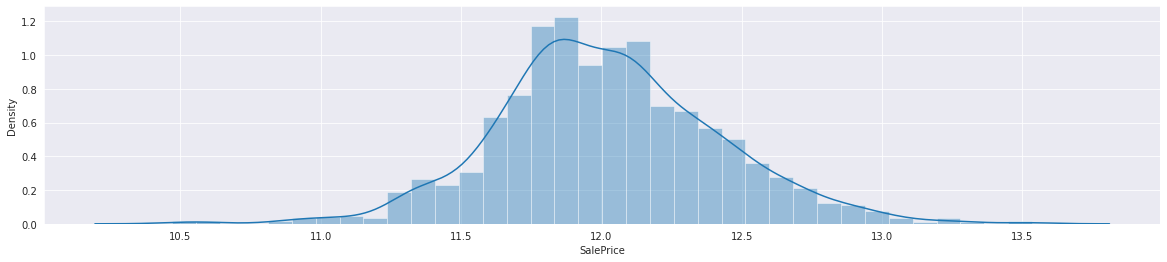

In [391]:
df["SalePrice"] = np.log(df['SalePrice'])
plt.figure(figsize=(20,4))
sns.distplot(df['SalePrice'])

Agora que estamos satisfeitos com os nossos dados finais, vamos avançar para a parte em que vamos resolver este problema de regressão - Modelação

# Modeling

In [392]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [393]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import  OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import time

from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [394]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [395]:
len(X.columns)

73

In [396]:
numbers_cols = list(X.select_dtypes(exclude='object').columns)

In [397]:
X[numbers_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,TotalBath,TotalPorch,BuildToRemod,MasVnrArea_bin,TotalBsmtFin_bin,TotalBsmtSF_bin,2ndFlrSF_bin,WoodDeckSF_bin,TotalPorch_bin,BuildToRemod_bin
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,3,61,0,1,1,1,1,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,2,0,0,0,1,1,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,3,42,1,1,1,1,1,0,1,1
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,1,307,55,0,1,1,1,0,1,1
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,3,84,0,1,1,1,1,1,1,0


In [398]:
object_cols = list(X.select_dtypes(include='object').columns)
X[object_cols].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,None,CBlock,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,None,BrkTil,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [399]:
algorithms = {
    'Linear': LinearRegression(),
    'KNN' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'Cat': CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
}

In [400]:
preprocessor = ColumnTransformer(
    transformers=[
        ('one', OneHotEncoder(handle_unknown = 'infrequent_if_exist'), object_cols),
        ('robust', RobustScaler(), numbers_cols)
    ])

In [401]:
def test_algorithms(X,y):
  result = pd.DataFrame()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
      
  scoring = {'MAE': 'neg_mean_absolute_error',
            'MSE': 'neg_mean_squared_error',
            'RMSE': 'neg_root_mean_squared_error',
            'R2': 'r2'}

  for key, algorithm in algorithms.items():
    start_time = time.time()
    print(f'{key}...', end = '')
    model = make_pipeline(preprocessor, algorithm)

    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator =True, error_score='raise')

    new_row = {
        'Algorithm': key,
        'MAE': np.mean(cv_results['test_MAE']),
        'MSE': np.mean(cv_results['test_MSE']),
        'RMSE': np.mean(cv_results['test_RMSE']),
        'R2': np.mean(cv_results['test_R2']),
        'model': cv_results['estimator'][0],
        'run_time': (time.time() - start_time) / 60
      }

    result = result.append(new_row, ignore_index=True)
    print(f'finished!!! {(time.time() - start_time) / 60} min(s).')
  return result.set_index('Algorithm', drop=True).sort_values(by='RMSE', ascending=False)

In [402]:
result = test_algorithms(X,y)
result

Linear...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.03706795771916707 min(s).
KNN...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.015170145034790038 min(s).
Decision Tree...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.021980289618174234 min(s).
Random Forest...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.774094553788503 min(s).
XGB...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.4946012338002523 min(s).
LGBM...

<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


finished!!! 0.09280836582183838 min(s).
Cat...finished!!! 1.7568352063496908 min(s).


<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat,-0.079082,-1.414424e-02,-1.182413e-01,9.084865e-01,"(ColumnTransformer(transformers=[('one',\n ...",1.756768
LGBM,-0.087316,-1.663558e-02,-1.285191e-01,8.923591e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.092751
XGB,-0.093464,-1.920214e-02,-1.381768e-01,8.758370e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.494546
Random Forest,-0.095167,-1.981425e-02,-1.402863e-01,8.720569e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.774003
Decision Tree,-0.148129,-4.391254e-02,-2.088241e-01,7.154971e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.021916
KNN,-0.157589,-5.351625e-02,-2.303753e-01,6.564199e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.015106
Linear,-693836.442804,-2.337575e+14,-7.530798e+06,-1.555824e+15,"(ColumnTransformer(transformers=[('one',\n ...",0.036912


# Hyper Parameter Tunning

In [403]:
cat = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
cat

In [404]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [405]:
#start = time.time()
param_lst = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9],
}

#catboost = RandomizedSearchCV(estimator = cat, param_distributions = param_lst, n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5)
#model = make_pipeline(preprocessor, catboost)
#catboost_search = model.fit(X_train, y_train)

# CatBoost with tuned hyperparams
#run_time = (time.time() - start) / 60
#run_time

In [406]:
#catboost_search[1].best_params_

In [407]:
#best_param = catboost_search[1].best_params_
#best_param

catboost_search[1].best_params_

```
{'rsm': 0.5,
 'random_strength': 0.25,
 'n_estimators': 1600,
 'min_child_samples': 10,
 'max_depth': 6,
 'learning_rate': 0.01,
 'l2_leaf_reg': 0.1}
```



In [408]:
algorithms = {
    'Cat Otimized': CatBoostRegressor(loss_function='RMSE', logging_level='Silent', rsm= 0.5, random_strength=0.25, n_estimators=1600, min_child_samples=10, max_depth=6, learning_rate=0.01,  l2_leaf_reg = 0.1)
}

In [409]:
algorithms

{'Cat Otimized': <catboost.core.CatBoostRegressor at 0x7f4be3e4ddc0>}

In [410]:
otimized_result = test_algorithms(X,y)

Cat Otimized...finished!!! 2.0795111695925397 min(s).


<ipython-input-401-cbb3776e4a14>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(new_row, ignore_index=True)


In [411]:
otimized_result

,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat Otimized,-0.080516,-0.014672,-0.120545,0.904993,"(ColumnTransformer(transformers=[('one',\n ...",2.07946


In [412]:
result = result.append(otimized_result)
result

<ipython-input-412-295934edb6f9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(otimized_result)


,MAE,MSE,RMSE,R2,model,run_time
Algorithm,,,,,,
Cat,-0.079082,-1.414424e-02,-1.182413e-01,9.084865e-01,"(ColumnTransformer(transformers=[('one',\n ...",1.756768
LGBM,-0.087316,-1.663558e-02,-1.285191e-01,8.923591e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.092751
XGB,-0.093464,-1.920214e-02,-1.381768e-01,8.758370e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.494546
Random Forest,-0.095167,-1.981425e-02,-1.402863e-01,8.720569e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.774003
Decision Tree,-0.148129,-4.391254e-02,-2.088241e-01,7.154971e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.021916
KNN,-0.157589,-5.351625e-02,-2.303753e-01,6.564199e-01,"(ColumnTransformer(transformers=[('one',\n ...",0.015106
Linear,-693836.442804,-2.337575e+14,-7.530798e+06,-1.555824e+15,"(ColumnTransformer(transformers=[('one',\n ...",0.036912
Cat Otimized,-0.080516,-1.467222e-02,-1.205450e-01,9.049927e-01,"(ColumnTransformer(transformers=[('one',\n ...",2.079460


In [413]:
final_model = result.loc['Cat Otimized']['model']
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['MSZoning', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'CentralAir', 'Electrical',
                                                   'Functional', 'Gar...
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1', 'BsmtFinSF1',
                                                   'BsmtFinType2', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   'HeatingQC', '2ndFlrSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'KitchenQual', 'Fireplaces', ...])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7f4be267e100>)])

# Pipeline

In [443]:
test_df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/House Prices/Input/test.csv')
X_test = test_df.drop('Id',axis=1)

In [444]:
drop_columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'PoolQC', 'MiscFeature', 'Alley', 'MoSold', 'YrSold', 'Utilities', 'Street', 'PoolArea', 'Condition2', '3SsnPorch', 'LowQualFinSF', 'RoofMatl', 'Heating', 'MiscVal', 'GarageCond']
X_test = X_test.drop(drop_columns, axis=1)

In [445]:
missing_values = X_test.isnull().sum()
missing_values[ missing_values > 0 ].sort_values(ascending=False)

Fence           1169
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [446]:
# Ordinal Features
ordinal = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence', 'KitchenQual', 'HeatingQC','ExterQual','ExterCond']
X_test[ordinal] = X_test[ordinal].fillna('NA')

In [447]:
# Categorical Features
cat_features = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
for col in cat_features:
  train_mode = df.groupby('Neighborhood')[col].apply(lambda x: x.mode()[0]).reset_index()
  mode_dict = dict(zip(train_mode['Neighborhood'], train_mode[col]))
  X_test[col] = test.apply(lambda row: mode_dict[row['Neighborhood']] if pd.isnull(row[col]) else row[col], axis=1)

In [448]:
# Numerical Features
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(LotFrontage_mean)
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(MasVnrArea_median)

In [449]:
missing_values = X_test.isnull().sum()
missing_values[ missing_values > 0 ].sort_values(ascending=False)

BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
GarageCars      1
dtype: int64

In [450]:
missing_columns = list(missing_values[ missing_values > 0 ].index)

In [451]:
df[ missing_columns ]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars
0,706,0,150,856,1,0,2
1,978,0,284,1262,0,1,2
2,486,0,434,920,1,0,2
3,216,0,540,756,1,0,3
4,655,0,490,1145,1,0,3
...,...,...,...,...,...,...,...
1455,0,0,953,953,0,0,2
1456,790,163,589,1542,1,0,2
1457,275,0,877,1152,0,0,1
1458,49,1029,0,1078,1,0,1


In [452]:
ordinal_numbers = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']
for col in ordinal_numbers:
  X_test[col] = X_test[col].fillna(0)

In [453]:
numerical_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
df[numerical_features].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1446.000000,1446.000000,1446.000000,1446.000000
mean,437.293223,45.311895,567.410097,1050.015214
std,433.175331,156.291141,439.895464,415.451928
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,224.000000,795.000000
50%,379.500000,0.000000,480.500000,990.000000
75%,707.500000,0.000000,808.000000,1285.500000
max,2260.000000,1127.000000,2153.000000,3206.000000


In [454]:
df['BsmtFinSF1'].mean()

437.29322268326416

In [455]:
for col in numerical_features:
  median = df[col].median()
  X_test[col] = X_test[col].fillna(median)

In [456]:
# Data Types
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual', 'FireplaceQu']
for col in ord_col:
    X_test[col] = X_test[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X_test[col] = X_test[col].map(fintype_map)

X_test['BsmtExposure'] = X_test['BsmtExposure'].map(expose_map)
X_test['Fence'] = X_test['Fence'].map(fence_map)

In [457]:
# Feature Engineering
X_test['TotalLot'] = X_test['LotFrontage'] + X_test['LotArea']
X_test['TotalBsmtFin'] = X_test['BsmtFinSF1'] + X_test['BsmtFinSF2']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['2ndFlrSF']
X_test['TotalBath'] = X_test['FullBath'] + X_test['HalfBath']
X_test['TotalPorch'] = X_test['OpenPorchSF'] + X_test['EnclosedPorch'] + X_test['ScreenPorch']

X_test['BuildToRemod'] = X_test['YearRemodAdd']	- X_test['YearBuilt'] 
X_test['BuildToRemod'].value_counts().sort_values(ascending=False)

columns = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch', 'BuildToRemod']

for column in columns:
    X_test[column +'_bin'] = X_test[column].apply(lambda x: 1 if x > 0 else 0)

In [458]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,TotalBath,TotalPorch,BuildToRemod,MasVnrArea_bin,TotalBsmtFin_bin,TotalBsmtSF_bin,2ndFlrSF_bin,WoodDeckSF_bin,TotalPorch_bin,BuildToRemod_bin
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,1,120,0,0,1,1,0,1,1,0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,2,36,0,1,1,1,0,1,1,0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,3,34,1,0,1,1,1,1,1,1
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,3,36,0,1,1,1,1,1,1,0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,2,226,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,2,0,0,0,0,1,1,0,0,0
1455,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,2,24,0,0,1,1,1,0,1,0
1456,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1,0,36,0,1,1,0,1,0,1
1457,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1,32,0,0,1,1,0,1,1,0


# Submission

In [465]:
pred = np.exp(final_model.predict(X_test))

In [466]:
sub = pd.Series(pred, index = test_df['Id'], name='SalePrice')

In [467]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
name = 'CatBoost'
path = f'/content/drive/MyDrive/Data Science/Projects/House Prices/Output/{name}_model.csv'
sub.to_csv(path, header=True)

Mounted at /content/drive


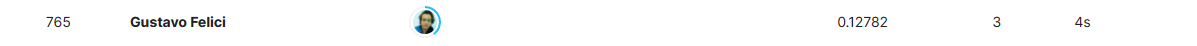

# Agradecimentos 

Com isso, concluo meu projeto de machine learning do House Prices do Kaggle. Foi um desafio emocionante que me permitiu aprimorar minhas habilidades em análise exploratória de dados, pré-processamento de dados e modelagem de machine learning.

Após testar diversos modelos, escolhi o CatBoostRegressor como meu modelo final. O CatBoost é um algoritmo de gradient boosting de árvore que é altamente escalável e preciso em problemas de regressão. Ele também possui recursos poderosos, como lidar com variáveis categóricas automaticamente e lidar com dados desbalanceados. Com o CatBoost, consegui alcançar uma boa pontuação no Kaggle e um bom desempenho no conjunto de testes.

Agradeço a quem leu até aqui e espero que você tenha achado este projeto interessante e informativo. Fique à vontade para verificar meus outros projetos de Data Science e machine learning no Kaggle.